In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Sheart\Sheart_NN_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.0,70.0,4,130,322,0,2.0,109.0,0.0,2.4,2.0,3.0,3.0
1,0.0,67.0,3,115,564,0,2.0,160.0,NaN,1.6,2.0,0.0,7.0
2,1.0,57.0,2,124,261,0,0.0,141.0,0.0,0.3,1.0,0.0,7.0
3,1.0,NaN,4,128,263,0,0.0,105.0,1.0,0.2,2.0,1.0,7.0
4,0.0,74.0,2,120,269,0,2.0,121.0,1.0,0.2,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.0,52.0,3,172,199,1,0.0,162.0,0.0,0.5,1.0,0.0,7.0
266,1.0,44.0,2,120,263,0,NaN,173.0,0.0,0.0,1.0,0.0,7.0
267,0.0,56.0,2,140,294,0,2.0,153.0,0.0,1.3,2.0,0.0,3.0
268,1.0,57.0,4,140,192,0,NaN,148.0,0.0,0.4,2.0,0.0,6.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	29
float64		column 2	14
int64		column 3	0
int64		column 4	0
int64		column 5	0
int64		column 6	0
float64		column 7	22
float64		column 8	7
float64		column 9	21
float64		column 10	29
float64		column 11	14
float64		column 12	7
float64		column 13	28


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,241.000000,256.000000,270.000000,270.000000,270.000000,270.000000,248.000000,263.000000,249.000000,241.000000,256.000000,263.000000,242.000000
mean,0.672199,54.503906,3.174074,131.344444,249.659259,0.148148,1.040323,149.615970,0.317269,1.049378,1.582031,0.657795,4.727273
std,0.470389,8.916606,0.950090,17.861608,51.686237,0.355906,0.997155,22.981756,0.466351,1.054519,0.620807,0.943442,1.941040
min,0.000000,29.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,0.000000,48.000000,3.000000,120.000000,213.000000,0.000000,0.000000,135.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,1.000000,55.000000,3.000000,130.000000,245.000000,0.000000,2.000000,154.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,1.000000,61.000000,4.000000,140.000000,280.000000,0.000000,2.000000,165.500000,1.000000,1.800000,2.000000,1.000000,7.000000
max,1.000000,77.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,3.000000,3.000000,7.000000


<AxesSubplot:>

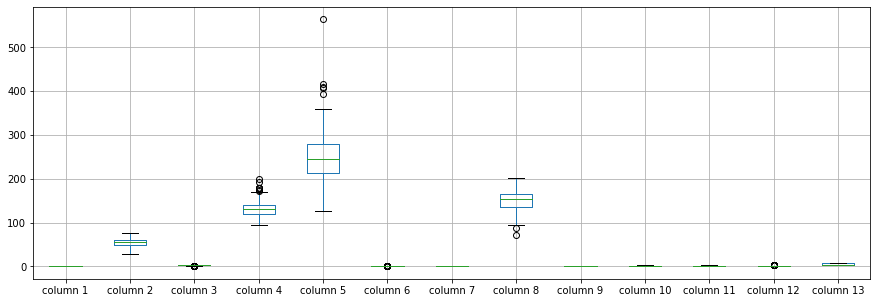

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.672199
column 2      54.503906
column 3       3.174074
column 4     131.344444
column 5     249.659259
column 6       0.148148
column 7       1.040323
column 8     149.615970
column 9       0.317269
column 10      1.049378
column 11      1.582031
column 12      0.657795
column 13      4.727273
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,-0.128840,0.029236,-0.046774,-0.233870,0.069455,0.019424,-0.057773,0.171772,0.078980,0.046318,0.073160,0.391649
column 2,-0.128840,1.000000,0.086543,0.242080,0.202164,0.110932,0.112491,-0.370445,0.125651,0.235918,0.173198,0.338056,0.091998
column 3,0.029236,0.086543,1.000000,-0.043196,0.090465,-0.098537,0.064887,-0.298361,0.352710,0.135459,0.131767,0.218611,0.276766
column 4,-0.046774,0.242080,-0.043196,1.000000,0.173019,0.155681,0.119044,-0.013774,0.099111,0.185897,0.158605,0.088127,0.128885
column 5,-0.233870,0.202164,0.090465,0.173019,1.000000,0.025186,0.177189,-0.005497,0.104149,0.075007,-0.033294,0.123528,0.026735
column 6,0.069455,0.110932,-0.098537,0.155681,0.025186,1.000000,0.038148,0.040827,-0.017927,0.015734,0.051120,0.114893,0.064854
column 7,0.019424,0.112491,0.064887,0.119044,0.177189,0.038148,1.000000,-0.055089,0.115570,0.175899,0.187404,0.165973,0.016239
column 8,-0.057773,-0.370445,-0.298361,-0.013774,-0.005497,0.040827,-0.055089,1.000000,-0.389360,-0.335701,-0.397986,-0.249251,-0.277026
column 9,0.171772,0.125651,0.352710,0.099111,0.104149,-0.017927,0.115570,-0.389360,1.000000,0.299243,0.263745,0.199711,0.365242
column 10,0.078980,0.235918,0.135459,0.185897,0.075007,0.015734,0.175899,-0.335701,0.299243,1.000000,0.586121,0.245690,0.307869


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+29,13+29+29,13+29+29+29,13+29+29+29+29,13+29+29+29+29+29,13+29+29+29+29,13+29+29+29,13+29+29,13+29,13], vae_layer = False, seed = 29)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 602.2784309387207
Epoch: 1 , loss: 601.4852333068848
Epoch: 2 , loss: 603.7975120544434
Epoch: 3 , loss: 602.1348075866699
Epoch: 4 , loss: 600.6335792541504
Epoch: 5 , loss: 601.9582901000977
Epoch: 6 , loss: 601.9590950012207
Epoch: 7 , loss: 601.5566635131836
Epoch: 8 , loss: 599.2171630859375
Epoch: 9 , loss: 599.9579124450684
Epoch: 10 , loss: 600.7664680480957
Epoch: 11 , loss: 601.2439270019531
Epoch: 12 , loss: 601.827808380127
Epoch: 13 , loss: 600.7476234436035
Epoch: 14 , loss: 600.6242713928223
Epoch: 15 , loss: 600.6588287353516
Epoch: 16 , loss: 601.2870063781738
Epoch: 17 , loss: 600.6389961242676
Epoch: 18 , loss: 600.497486114502
Epoch: 19 , loss: 602.9880065917969
Epoch: 20 , loss: 600.7452125549316
Epoch: 21 , loss: 601.1911392211914
Epoch: 22 , loss: 599.2160339355469
Epoch: 23 , loss: 600.6860046386719
Epoch: 24 , loss: 600.8051452636719
Epoch: 25 , loss: 599.4930114746094
Epoch: 2

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(270, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1       1.000000
column 2      48.000000
column 3       2.000000
column 4     130.000000
column 5     245.000000
column 6       0.000000
column 7       2.000000
column 8     180.000000
column 9       0.000000
column 10      0.200000
column 11      0.242697
column 12      0.000000
column 13      3.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Sheart.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.0,0.00000,0,0,0,0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.00000,0,0,0,0,0.000000,0.0,0.052634,0.0,0.0,0.0,0.0
2,0.0,0.00000,0,0,0,0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,-62.86928,0,0,0,0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.00000,0,0,0,0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.0,0.00000,0,0,0,0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
266,0.0,0.00000,0,0,0,0,0.224445,0.0,0.000000,0.0,0.0,0.0,0.0
267,0.0,0.00000,0,0,0,0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
268,0.0,0.00000,0,0,0,0,0.136764,0.0,0.000000,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(451.7966199317767, 5414.752392307519)

In [17]:
NRMS=numerator/denominator
NRMS


0.08343809415433709

In [18]:
new_df.iloc[66,:]

column 1       1.0
column 2      51.0
column 3       4.0
column 4     140.0
column 5     261.0
column 6       0.0
column 7       2.0
column 8     186.0
column 9       1.0
column 10      0.0
column 11      1.0
column 12      0.0
column 13      3.0
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.0,70.00000,4,130,322,0,2.000000,109.0,0.000000,2.4,2.0,3.0,3.0
1,0.0,67.00000,3,115,564,0,2.000000,160.0,0.052634,1.6,2.0,0.0,7.0
2,1.0,57.00000,2,124,261,0,0.000000,141.0,0.000000,0.3,1.0,0.0,7.0
3,1.0,1.13072,4,128,263,0,0.000000,105.0,1.000000,0.2,2.0,1.0,7.0
4,0.0,74.00000,2,120,269,0,2.000000,121.0,1.000000,0.2,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.0,52.00000,3,172,199,1,0.000000,162.0,0.000000,0.5,1.0,0.0,7.0
266,1.0,44.00000,2,120,263,0,0.224445,173.0,0.000000,0.0,1.0,0.0,7.0
267,0.0,56.00000,2,140,294,0,2.000000,153.0,0.000000,1.3,2.0,0.0,3.0
268,1.0,57.00000,4,140,192,0,0.136764,148.0,0.000000,0.4,2.0,0.0,6.0


In [20]:
imputations[-1].to_excel("Sheart_NN_5(imp).xlsx", index=False, header=False)